In [2]:
#cálculo numérico y análisis de datos
import numpy as np
#manipulación y análisis de datos (estructuras de datos)
import pandas as pd

quemadura_data = pd.read_csv("arbQuemadura.csv", index_col=0)
quemadura_data.head()


Entropia del arbol 0.954434002924965


,Pelo,Altura,Peso,Proteccion,Quemadura
Ejemplo,,,,,
1,rubio,medio,bajo,no,si
2,rubio,alto,medio,si,no
3,moreno,bajo,medio,si,no
4,rubio,bajo,medio,no,si
5,rojo,medio,alto,no,si


In [3]:
#caluclar la entropia
def calcular_entropia(p):
    return -np.sum(p*np.log2(p))
#contar las clases del arbol
valores, cuantos = np.unique(quemadura_data['Quemadura'], return_counts=True)
entropia = calcular_entropia(cuantos/sum(cuantos))
print("Entropia del arbol",entropia)
valores,cuantos

Entropia del arbol:  0.954434002924965


(array(['no', 'si'], dtype=object), array([5, 3], dtype=int64))

In [213]:
#calcular la ganancia
def calcular_ganancia(valores, var='Pelo'):
    
    valores, cuantos = np.unique(quemadura_data[var],return_counts=True)
    #genero una lista para calcular la ganancia
    info_A = []
    
    for e in valores:
        se = np.where(quemadura_data[var]==e)
        print("tiene se",se)
        #particiona por valor
        se_quemadura = quemadura_data['Quemadura'][quemadura_data.index[se[0]]]
        print("se_quemadura",se_quemadura)
        #valores por subgrupo
        v_se_quemadura, c_se_quemadura = np.unique(se_quemadura,return_counts=True)
        print("subgrupos ",v_se_quemadura,c_se_quemadura)
        #entropia del valor
        se_entropia = abs(calcular_entropia(c_se_quemadura/sum(c_se_quemadura)))
        print("se_entropia",se_entropia)
        #probabilidad del valor
        se_size = sum(c_se_quemadura)/len(quemadura_data.index)
        print("probabilidad valor",se_size)
        #almacenar valores
        info_A += [[se_entropia, se_size]]
        print("info_A",info_A)
    #convertir lista en arreglo
    info_A = np.array(info_A)
    #calcular la entropia de la variable
    info_g = np.sum(info_A[:,0]*info_A[:,1])
    print("info_g",info_g)
    return info_g

info_A= calcular_ganancia(valores, var='Pelo')
ganancia = entropia - info_A
print("ganancia de pelo",ganancia)

****************** Pelo *************
Entropia 0.954434002924965
moreno
Subgrupos:  ['no'] [3]
rojo
Subgrupos:  ['si'] [1]
rubio
Subgrupos:  ['no' 'si'] [2 2]
Ganancia:  0.9056390622295665
****************** Altura *************
Entropia 0.954434002924965
alto
Subgrupos:  ['no'] [2]
bajo
Subgrupos:  ['no' 'si'] [2 1]
medio
Subgrupos:  ['no' 'si'] [1 2]
Ganancia:  0.8725562489182658
****************** Peso *************
Entropia 0.954434002924965
alto
Subgrupos:  ['no' 'si'] [2 1]
bajo
Subgrupos:  ['no' 'si'] [1 1]
medio
Subgrupos:  ['no' 'si'] [2 1]
Ganancia:  0.6225562489182659
****************** Proteccion *************
Entropia 0.954434002924965
no
Subgrupos:  ['no' 'si'] [2 3]
si
Subgrupos:  ['no'] [3]
Ganancia:  0.34758988139079716


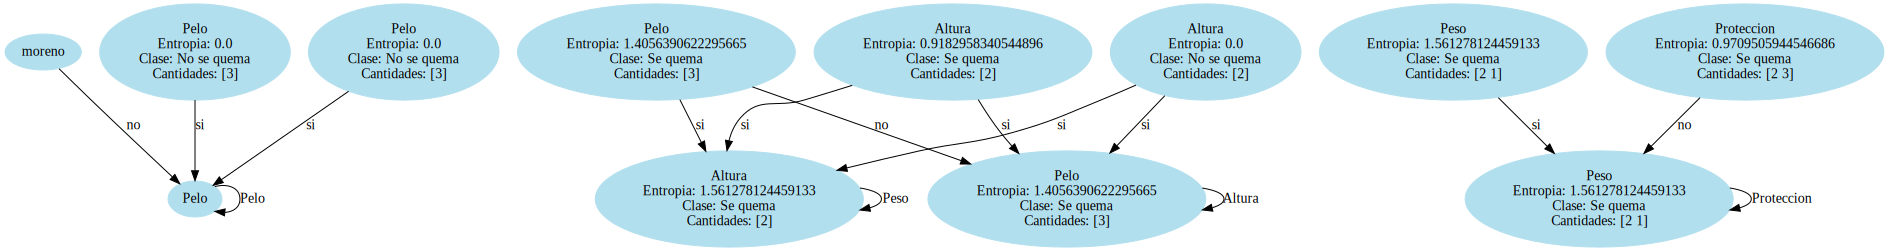

In [13]:
#altura
info_A= calcular_ganancia(valores, var='Altura')
ganancia = entropia - info_A
print("ganancia de altura",ganancia)

In [14]:
#ganancia de peso
info_A= calcular_ganancia(valores, var='Peso')
ganancia = entropia - info_A
print("ganancia de peso",ganancia)

tiene se (array([4, 5, 6], dtype=int64),)
se_quemadura Ejemplo
5    si
6    no
7    no
Name: Quemadura, dtype: object
subgrupos  ['no' 'si'] [2 1]
se_entropia 0.9182958340544896
probabilidad valor 0.375
bajo
subgrupos  ['no' 'si'] [1 1]
se_entropia 1.0
probabilidad valor 0.25
medio
subgrupos  ['no' 'si'] [2 1]
se_entropia 0.9182958340544896
probabilidad valor 0.375
info_g 0.9387218755408671
ganancia de peso 0.015712127384097996


In [214]:
#utilizando la librería sklearn

from sklearn import tree
from sklearn import preprocessing

data = pd.DataFrame()
le = preprocessing.LabelEncoder()
var = ["Pelo","Altura","Peso","Proteccion","Quemadura"]

for v in var:
    le.fit(quemadura_data[v])
    data[v] = le.transform(quemadura_data[v])
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]
clf = clf.fit(t_data, t_target)
t_data, t_target,clf
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(t_data.columns.values),
                         class_names=["NO Quema", "Se quema"],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

(   Pelo  Altura  Peso  Proteccion
 0     2       2     1           0
 1     2       0     2           1
 2     0       1     2           1
 3     2       1     2           0
 4     1       2     0           0
 5     0       0     0           0
 6     0       2     0           0
 7     2       1     1           1,
 0    1
 1    0
 2    0
 3    1
 4    1
 5    0
 6    0
 7    0
 Name: Quemadura, dtype: int32,
 DecisionTreeClassifier(criterion='entropy', max_depth=4))